In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow.compat.v1 as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from os import scandir, getcwd
import os
import random

tf.disable_v2_behavior()



rootDir=r'C:\Users\Carlos\Documents\UPM\TFM\Experiments_dataset\stadistics'
rootDir1=r'C:\Users\Carlos\Documents\UPM\TFM\Experiments_dataset\prueba'
rootDir2=r'C:\Users\Carlos\Documents\UPM\TFM\Experiments_dataset\prueba1'
rootDir3=r'C:\Users\Carlos\Documents\UPM\TFM\Experiments_dataset\prueba2'
timestep=30
N_FEATURES=66

def fun(x):
    if (x>=-1 and x<100/20):
        return 0
    if (x>=100/20 and x<100/3):
        return 1
    elif (x>=100/3):
        return 2
    


data=[]
data1=[]
data2=[]
data3=[]
labels=[]
labels1=[]
labels2=[]
labels3=[]
a=os.listdir(rootDir)    

for arch in a:
    df=pd.read_csv(rootDir + '\\'+arch)
    print(len(df))
    df['pain']=df['pain'].apply(fun)
    df.drop(df.head(60).index,inplace=True)
    df.index = range(0,len(df) )
    pain=df['pain']
    df=df.drop(['pain'],axis=1)
    df=(df-df.mean())/df.std()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    g=0
    for i in df.columns:
        for j in range(len(df)):
            if((df[i][j] < (Q1[i] - 1.5 * IQR[i])) |(df[i][j] > (Q3[i] + 1.5 * IQR[i]))):
                g+=1
                media=df[i].mean()
                desviacion=df[i].std()
                aleatorio=random.uniform(media-desviacion, media+desviacion)
                df[i][j]=aleatorio
       
    
    #df.drop(columns=['maxEDA_smna30','maxEDA_smna15','maxEDA_smna5','countEDA_smna30','countEDA_smna15','countEDA_smna5'], inplace=True)
    for i in range (0, len(pain)-30):
        labels.append(pain[i])
    a2D_segments=df.values
    
    for i in range (0, len(a2D_segments)-timestep):
         data.append(a2D_segments[i:i+timestep]) 
np.array(data).shape

a1=os.listdir(rootDir1)    

for arch in a1:
    df=pd.read_csv(rootDir1 + '\\'+arch)
    print(len(df))
    df['pain']=df['pain'].apply(fun)
    pain=df['pain']
    df=df.drop(['pain'],axis=1)
    df=(df-df.mean())/df.std()

    #df.drop(columns=['maxEDA_smna30','maxEDA_smna15','maxEDA_smna5','countEDA_smna30','countEDA_smna15','countEDA_smna5'], inplace=True)
    for i in range (0, len(pain)-30):
        labels1.append(pain[i])
    a2D_segments=df.values
    
    for i in range (0, len(a2D_segments)-timestep):
         data1.append(a2D_segments[i:i+timestep]) 
np.array(data1).shape


a2=os.listdir(rootDir2)    

for arch in a2:
    df=pd.read_csv(rootDir2 + '\\'+arch)
    print(len(df))
    df['pain']=df['pain'].apply(fun)
    pain=df['pain']
    df=df.drop(['pain'],axis=1)
    df=(df-df.mean())/df.std()

    #df.drop(columns=['maxEDA_smna30','maxEDA_smna15','maxEDA_smna5','countEDA_smna30','countEDA_smna15','countEDA_smna5'], inplace=True)
    for i in range (0, len(pain)-30):
        labels2.append(pain[i])
    a2D_segments=df.values
    
    for i in range (0, len(a2D_segments)-timestep):
         data2.append(a2D_segments[i:i+timestep]) 
np.array(data2).shape


a3=os.listdir(rootDir3)    

for arch in a3:
    df=pd.read_csv(rootDir3 + '\\'+arch)
    print(len(df))
    df['pain']=df['pain'].apply(fun)
    pain=df['pain']
    df=df.drop(['pain'],axis=1)
    df=(df-df.mean())/df.std()

    #df.drop(columns=['maxEDA_smna30','maxEDA_smna15','maxEDA_smna5','countEDA_smna30','countEDA_smna15','countEDA_smna5'], inplace=True)
    for i in range (0, len(pain)-30):
        labels3.append(pain[i])
    a2D_segments=df.values
    
    for i in range (0, len(a2D_segments)-timestep):
         data3.append(a2D_segments[i:i+timestep]) 
np.array(data3).shape

#np.random.shuffle(data)

Instructions for updating:
non-resource variables are not supported in the long term
1307
1210
2366
1651
2144
2144
2144
1533
461
2579
2536
2378
1834
1567
1174
1400
2068
2348


(2318, 30, 66)

In [14]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
labels[0]

array([1., 0., 0., 0.], dtype=float32)

In [2]:
RANDOM_SEED = 42
#X_train, X_test, y_train, y_test = train_test_split(
#        data, labels, test_size=0, random_state=RANDOM_SEED)
X_train=data
y_train=labels
X_test=data1
y_test=labels1
X_test= np.round(X_test,decimals=6)
X_train= np.round(X_train,decimals=6)

Using Theano backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 66)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3)                 840       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
Total params: 852
Trainable params: 852
Non-trainable params: 0
_________________________________________________________________
Train on 10282 samples, validate on 2114 samples
Epoch 1/100
10282/10282 [==============================] - 3s 246us/step - loss: 1.0312 - accuracy: 0.4873 - val_loss: 1.1514 - val_accuracy: 0.2800
Epoch 2/100
10282/10282 [==============================] - 2s 165us/step - loss: 0.9915 - accuracy: 0.5498 - val_loss: 1.1920 - val_accuracy: 0.2460
Epoch 3/100
10282/10282 [===================

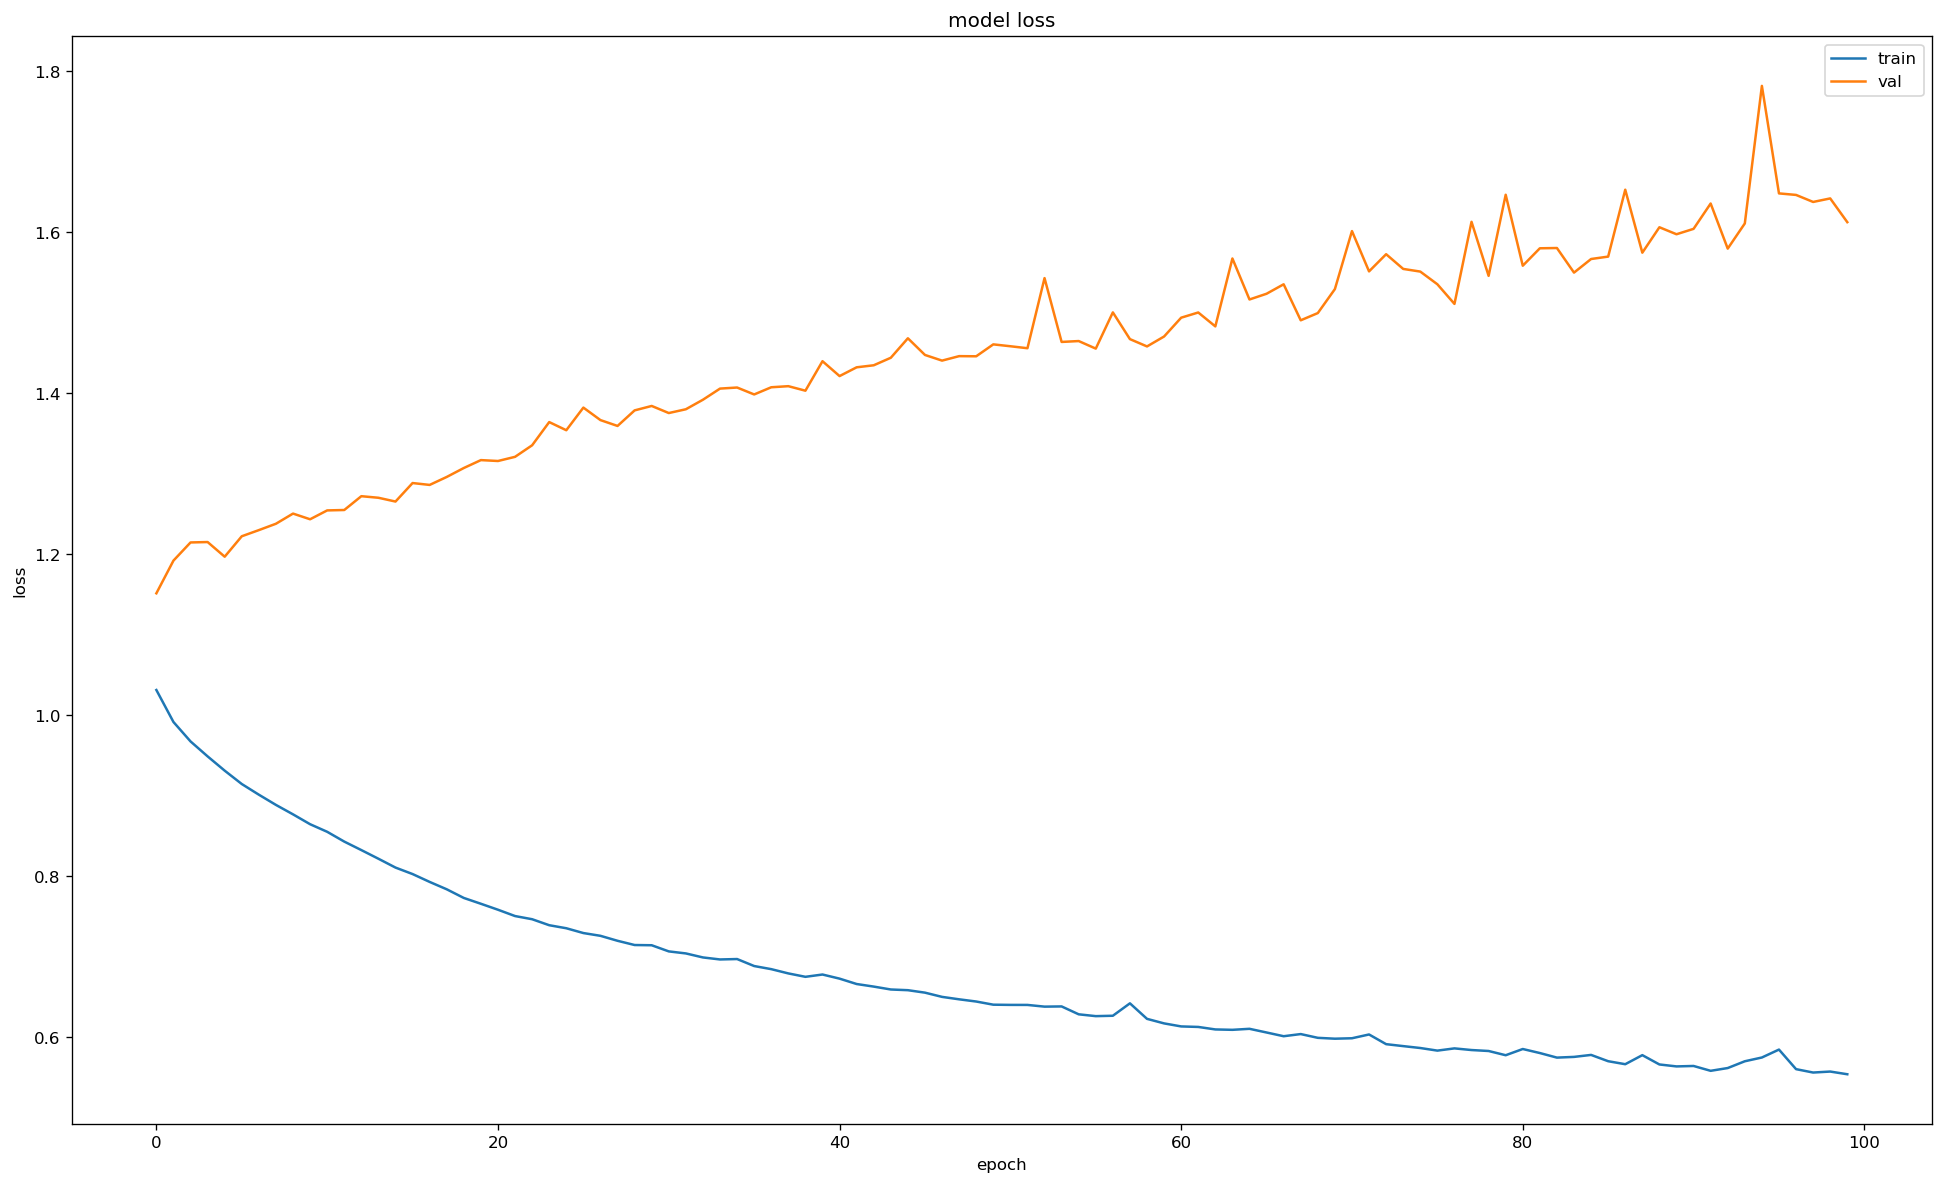

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers, Input, Model
from keras.optimizers import Adam
from keras.utils import to_categorical

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

onehot_test = to_categorical(y_test, num_classes=3)
onehot_test1 = to_categorical(labels2, num_classes=3)
onehot_test2 = to_categorical(labels3, num_classes=3)

onehot_train = to_categorical(y_train, num_classes=len(np.unique(y_train)))

# Model
input_tensor = Input(batch_shape=(None,X_train.shape[1],X_train.shape[2]))
rnn_1 = LSTM(units=3, stateful=False, return_sequences=False)(input_tensor)
#rnn_2 = LSTM(units=16, stateful=False, return_sequences=False)(rnn_1)
#rnn_3 = LSTM(units=, stateful=False, return_sequences=False)(rnn_2)
#rnn_4 = LSTM(units=64, stateful=False, return_sequences=True)(rnn_3)
#rnn_5 = LSTM(units=64, stateful=False, return_sequences=False)(rnn_4)
output_tensor = Dense(units=3, activation='softmax')(rnn_1)

model = Model(inputs=input_tensor, outputs = output_tensor)


optimizer = 'Adam'
loss = 'categorical_crossentropy'

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.summary()

#fit model
history = model.fit(X_train, onehot_train, 
                    shuffle=True, epochs=100, 
                    batch_size=512, 
                    validation_data=(X_test,onehot_test))
train_curve=history.history['loss']
validation_curve=history.history['val_loss']
# summarize history for loss
plt.figure(figsize=(20, 12), dpi= 120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()                    

In [4]:
#Calculamos probabilidades del validation

from scipy import stats

pred_probabilities=model.predict(X_test)
maximo=np.argmax(pred_probabilities,1)
probabilidad_alta=[]
for i in range(len(pred_probabilities)):
    n=0
    x=0
    for j in range(len(pred_probabilities[0])): 
        
        if(pred_probabilities[i][j]>0.75):
            if(x==0):
                x=1
                indice=j
                n=1
            else:
                indice=32       
    if(n==0):    
        if(i>0):
            probabilidad_alta.append(probabilidad_alta[i-1])
        else:
            probabilidad_alta.append(np.argmax(pred_probabilities[i]))
    else:
        if(i>0):
            if (indice==32):
                probabilidad_alta.append(probabilidad_alta[i-1])
            else:
                probabilidad_alta.append(indice)
        else:
            probabilidad_alta.append(np.argmax(pred_probabilities[i]))
            
probabilidad_suma=[]
for i in range(len(pred_probabilities)):
    if((pred_probabilities[i][1]+pred_probabilities[i][2])>0.75):
        probabilidad_suma.append(1)
    else:
        probabilidad_suma.append(0)
labels_suma=[]
for i in range(len(labels1)):
    if(labels1[i]==0):
        labels_suma.append(0)
    else:
        labels_suma.append(1)

promedio_max=[]
promedio_prob=[]
promedio_suma=[]
window_fix=30
for i in range(0, len(maximo)):
    if(i-window_fix<0):
        if (i==0):
            window=maximo[0]
        else:
            window=maximo[0:i]
    else:
        window=maximo[i-window_fix:i]
    moda=stats.mode(window)
    promedio_max.append(moda[0][0])

for i in range(len(probabilidad_alta)):
    if(i-window_fix<0):
        if(i==0):
            window=probabilidad_alta[0]
        else:
            window=probabilidad_alta[0:i]
    else:
        window=probabilidad_alta[i-window_fix:i]
    moda=stats.mode(window)
    promedio_prob.append(moda[0][0])
    
for i in range(len(probabilidad_suma)):
    if(i-window_fix<0):
        if(i==0):
            window=probabilidad_suma[0]
        else:
            window=probabilidad_suma[0:i]
    else:
        window=probabilidad_suma[i-window_fix:i]
    moda=stats.mode(window)
    promedio_suma.append(moda[0][0])
        
print(len(maximo))
print(len(promedio_max))
print(len(promedio_prob))
print(len(promedio_suma))
print(len(probabilidad_alta))
print(len(probabilidad_suma))
print(len(labels_suma))

NameError: name 'model' is not defined

In [6]:
#pred_probabilities= model.predict(X_test)


recall=recall_score(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1), average='macro') 
prec=precision_score(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1), average='macro')
f1=f1_score(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1), average='macro')
acc=accuracy_score(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

recall1=recall_score(np.argmax(onehot_test,1), np.array(probabilidad_alta), average='macro') 
prec1=precision_score(np.argmax(onehot_test,1), np.array(probabilidad_alta), average='macro')
f11=f1_score(np.argmax(onehot_test,1), np.array(probabilidad_alta), average='macro')
acc1=accuracy_score(np.argmax(onehot_test,1), np.array(probabilidad_alta))

recall2=recall_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro') 
prec2=precision_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro')
f12=f1_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro')
acc2=accuracy_score(np.array(labels_suma), np.array(probabilidad_suma))

recall3=recall_score(np.argmax(onehot_test,1), np.array(promedio_max), average='macro') 
prec3=precision_score(np.argmax(onehot_test,1), np.array(promedio_max), average='macro')
f13=f1_score(np.argmax(onehot_test,1), np.array(promedio_max), average='macro')
acc3=accuracy_score(np.argmax(onehot_test,1), np.array(promedio_max))

recall4=recall_score(np.argmax(onehot_test,1), np.array(promedio_prob), average='macro') 
prec4=precision_score(np.argmax(onehot_test,1), np.array(promedio_prob), average='macro')
f14=f1_score(np.argmax(onehot_test,1), np.array(promedio_prob), average='macro')
acc4=accuracy_score(np.argmax(onehot_test,1), np.array(promedio_prob))

recall5=recall_score(np.array(labels_suma), np.array(promedio_suma), average='macro') 
prec5=precision_score(np.array(labels_suma), np.array(promedio_suma), average='macro')
f15=f1_score(np.array(labels_suma), np.array(promedio_suma), average='macro')
acc5=accuracy_score(np.array(labels_suma), np.array(promedio_suma))

print('accuracy: ',acc)
print('recall: ', recall)
print('precision: ',prec)
print('f1: ', f1)
print('\nprobabilidad alta')
print('accuracy: ',acc1)
print('recall: ', recall1)
print('precision: ',prec1)
print('f1: ', f11)
print('\nprobabilidad suma')
print('accuracy: ',acc2)
print('recall: ', recall2)
print('precision: ',prec2)
print('f1: ', f12)
print('\nPromedio probabilidad suma')
print('accuracy: ',acc3)
print('recall: ', recall3)
print('precision: ',prec3)
print('f1: ', f13)
print('\nPromedio probabilidad alta')
print('accuracy: ',acc4)
print('recall: ', recall4)
print('precision: ',prec4)
print('f1: ', f14)
print('\nPromedio probabilidad suma')
print('accuracy: ',acc5)
print('recall: ', recall5)
print('precision: ',prec5)
print('f1: ', f15)

accuracy:  0.379848628192999
recall:  0.3952805022301016
precision:  0.3456710942926648
f1:  0.33131266767361683

probabilidad alta
accuracy:  0.4148533585619678
recall:  0.454934107188957
precision:  0.37757519385445265
f1:  0.33771623796433897

probabilidad suma
accuracy:  0.5127719962157048
recall:  0.6684867780495698
precision:  0.6180881777619309
f1:  0.5019228428978336

Promedio probabilidad suma
accuracy:  0.3566698202459792
recall:  0.3645094568026548
precision:  0.3089991054585081
f1:  0.30262986148053556

Promedio probabilidad alta
accuracy:  0.40586565752128667
recall:  0.4416466826538769
precision:  0.3660797684321857
f1:  0.33000638385366937

Promedio probabilidad suma
accuracy:  0.5141911069063387
recall:  0.6766059162098724
precision:  0.6248541411913269
f1:  0.5042742536695745


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix valor máximo:
 [[276   3 138]
 [464  33 172]
 [507  71 450]]
Confusion Matrix probabilidad alta:
 [[309  43  65]
 [595   0  74]
 [386 207 435]]
Confusion Matrix suma de probabilidades:
 [[ 407   10]
 [1428  269]]


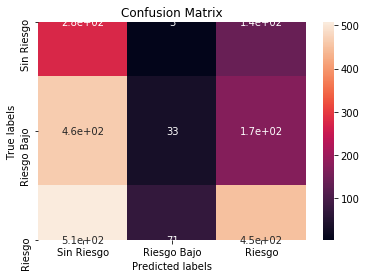

In [59]:
###### import seaborn as sns
 
from sklearn.metrics import confusion_matrix as cm


ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))
ConfMatrix1=cm(np.argmax(onehot_test,1), np.array(probabilidad_alta))
ConfMatrix2=cm(np.array(labels_suma), np.array(probabilidad_suma))

print('Confusion Matrix valor máximo:\n',ConfMatrix)
print('Confusion Matrix probabilidad alta:\n',ConfMatrix1)
print('Confusion Matrix suma de probabilidades:\n',ConfMatrix2)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['Sin Riesgo', 'Riesgo Bajo','Riesgo'])
ax.yaxis.set_ticklabels(['Sin Riesgo', 'Riesgo Bajo','Riesgo']);

In [4]:
#Calculamos probabilidades del test con basales

pred_probabilities=model.predict(np.array(data2))
maximo=np.argmax(pred_probabilities,1)
probabilidad_alta=[]
for i in range(len(pred_probabilities)):
    n=0
    x=0
    for j in range(len(pred_probabilities[0])): 
        
        if(pred_probabilities[i][j]>0.75):
            if(x==0):
                x=1
                indice=j
                n=1
            else:
                indice=32       
    if(n==0):    
        if(i>0):
            probabilidad_alta.append(probabilidad_alta[i-1])
        else:
            probabilidad_alta.append(np.argmax(pred_probabilities[i]))
    else:
        if(i>0):
            if (indice==32):
                probabilidad_alta.append(probabilidad_alta[i-1])
            else:
                probabilidad_alta.append(indice)
        else:
            probabilidad_alta.append(np.argmax(pred_probabilities[i]))
            
probabilidad_suma=[]
for i in range(len(pred_probabilities)):
    if((pred_probabilities[i][1]+pred_probabilities[i][2])>0.75):
        probabilidad_suma.append(1)
    else:
        probabilidad_suma.append(0)
labels_suma=[]
for i in range(len(labels2)):
    if(labels2[i]==0):
        labels_suma.append(0)
    else:
        labels_suma.append(1)

promedio_max=[]
promedio_prob=[]
promedio_suma=[]
window_fix=30
for i in range(0, len(maximo)):
    if(i-window_fix<0):
        if (i==0):
            window=maximo[0]
        else:
            window=maximo[0:i]
    else:
        window=maximo[i-window_fix:i]
    moda=stats.mode(window)
    promedio_max.append(moda[0][0])

for i in range(len(probabilidad_alta)):
    if(i-window_fix<0):
        if(i==0):
            window=probabilidad_alta[0]
        else:
            window=probabilidad_alta[0:i]
    else:
        window=probabilidad_alta[i-window_fix:i]
    moda=stats.mode(window)
    promedio_prob.append(moda[0][0])
    
for i in range(len(probabilidad_suma)):
    if(i-window_fix<0):
        if(i==0):
            window=probabilidad_suma[0]
        else:
            window=probabilidad_suma[0:i]
    else:
        window=probabilidad_suma[i-window_fix:i]
    moda=stats.mode(window)
    promedio_suma.append(moda[0][0])
        
print(len(maximo))
print(len(promedio_max))
print(len(promedio_prob))
print(len(promedio_suma))
print(len(probabilidad_alta))
print(len(probabilidad_suma))
print(len(labels_suma))

17230
17230
17230
17230
17230
17230
17230


In [5]:
#pred_probabilities= model.predict(X_test)


recall=recall_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities,1), average='macro') 
prec=precision_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities,1), average='macro')
f1=f1_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities,1), average='macro')
acc=accuracy_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities,1))

recall1=recall_score(np.argmax(onehot_test1,1), np.array(probabilidad_alta), average='macro') 
prec1=precision_score(np.argmax(onehot_test1,1), np.array(probabilidad_alta), average='macro')
f11=f1_score(np.argmax(onehot_test1,1), np.array(probabilidad_alta), average='macro')
acc1=accuracy_score(np.argmax(onehot_test1,1), np.array(probabilidad_alta))

recall2=recall_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro') 
prec2=precision_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro')
f12=f1_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro')
acc2=accuracy_score(np.array(labels_suma), np.array(probabilidad_suma))

recall3=recall_score(np.argmax(onehot_test1,1), np.array(promedio_max), average='macro') 
prec3=precision_score(np.argmax(onehot_test1,1), np.array(promedio_max), average='macro')
f13=f1_score(np.argmax(onehot_test1,1), np.array(promedio_max), average='macro')
acc3=accuracy_score(np.argmax(onehot_test1,1), np.array(promedio_max))

recall4=recall_score(np.argmax(onehot_test1,1), np.array(promedio_prob), average='macro') 
prec4=precision_score(np.argmax(onehot_test1,1), np.array(promedio_prob), average='macro')
f14=f1_score(np.argmax(onehot_test1,1), np.array(promedio_prob), average='macro')
acc4=accuracy_score(np.argmax(onehot_test1,1), np.array(promedio_prob))

recall5=recall_score(np.array(labels_suma), np.array(promedio_suma), average='macro') 
prec5=precision_score(np.array(labels_suma), np.array(promedio_suma), average='macro')
f15=f1_score(np.array(labels_suma), np.array(promedio_suma), average='macro')
acc5=accuracy_score(np.array(labels_suma), np.array(promedio_suma))

print('accuracy: ',acc)
print('recall: ', recall)
print('precision: ',prec)
print('f1: ', f1)
print('\nprobabilidad alta')
print('accuracy: ',acc1)
print('recall: ', recall1)
print('precision: ',prec1)
print('f1: ', f11)
print('\nprobabilidad suma')
print('accuracy: ',acc2)
print('recall: ', recall2)
print('precision: ',prec2)
print('f1: ', f12)
print('\nPromedio probabilidad maximo')
print('accuracy: ',acc3)
print('recall: ', recall3)
print('precision: ',prec3)
print('f1: ', f13)
print('\nPromedio probabilidad alta')
print('accuracy: ',acc4)
print('recall: ', recall4)
print('precision: ',prec4)
print('f1: ', f14)
print('\nPromedio probabilidad suma')
print('accuracy: ',acc5)
print('recall: ', recall5)
print('precision: ',prec5)
print('f1: ', f15)

accuracy:  0.7641323273360418
recall:  0.25471077577868056
precision:  0.3333333333333333
f1:  0.2887660657104005

probabilidad alta
accuracy:  0.9475333720255369
recall:  0.31584445734184563
precision:  0.3333333333333333
f1:  0.32435331982357846

probabilidad suma
accuracy:  0.8360998258850841
recall:  0.41804991294254207
precision:  0.5
f1:  0.45536730307244905

Promedio probabilidad maximo
accuracy:  0.8079512478235635
recall:  0.26931708260785453
precision:  0.3333333333333333
f1:  0.29792516024097676

Promedio probabilidad alta
accuracy:  0.9492164828787
recall:  0.3164054942929
precision:  0.3333333333333333
f1:  0.3246489007989678

Promedio probabilidad suma
accuracy:  0.8663958212420197
recall:  0.4331979106210099
precision:  0.5
f1:  0.4642079731326575


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [7]:
## import seaborn as sns
 
from sklearn.metrics import confusion_matrix as cm


ConfMatrix=cm(np.argmax(onehot_test1,1), np.argmax(pred_probabilities,1))
ConfMatrix1=cm(np.argmax(onehot_test1,1), np.array(probabilidad_alta))
ConfMatrix2=cm(np.array(labels_suma), np.array(probabilidad_suma))
ConfMatrix3=cm(np.argmax(onehot_test1,1), np.array(promedio_prob))
ConfMatrix4=cm(np.array(labels_suma), np.array(promedio_suma))

print('Confusion Matrix valor máximo:\n',ConfMatrix)
print('Confusion Matrix probabilidad alta:\n',ConfMatrix1)
print('Confusion Matrix suma de probabilidades:\n',ConfMatrix2)
print('Confusion Matrix probabilidad alta tiempo:\n',ConfMatrix3)
print('Confusion Matrix suma de probabilidades tiempo:\n',ConfMatrix4)

Confusion Matrix valor máximo:
 [[13166  1220  2844]
 [    0     0     0]
 [    0     0     0]]
Confusion Matrix probabilidad alta:
 [[16326   203   701]
 [    0     0     0]
 [    0     0     0]]
Confusion Matrix suma de probabilidades:
 [[14406  2824]
 [    0     0]]
Confusion Matrix probabilidad alta tiempo:
 [[16355   187   688]
 [    0     0     0]
 [    0     0     0]]
Confusion Matrix suma de probabilidades tiempo:
 [[14928  2302]
 [    0     0]]


In [15]:
#Calculamos probabilidades del test con migraña rara

pred_probabilities=model.predict(np.array(data3))
maximo=np.argmax(pred_probabilities,1)
probabilidad_alta=[]
for i in range(len(pred_probabilities)):
    n=0
    x=0
    for j in range(len(pred_probabilities[0])): 
        
        if(pred_probabilities[i][j]>0.75):
            if(x==0):
                x=1
                indice=j
                n=1
            else:
                indice=32       
    if(n==0):    
        if(i>0):
            probabilidad_alta.append(probabilidad_alta[i-1])
        else:
            probabilidad_alta.append(np.argmax(pred_probabilities[i]))
    else:
        if(i>0):
            if (indice==32):
                probabilidad_alta.append(probabilidad_alta[i-1])
            else:
                probabilidad_alta.append(indice)
        else:
            probabilidad_alta.append(np.argmax(pred_probabilities[i]))
            
probabilidad_suma=[]
for i in range(len(pred_probabilities)):
    if((pred_probabilities[i][1]+pred_probabilities[i][2])>0.75):
        probabilidad_suma.append(1)
    else:
        probabilidad_suma.append(0)
labels_suma=[]
for i in range(len(labels3)):
    if(labels3[i]==0):
        labels_suma.append(0)
    else:
        labels_suma.append(1)

promedio_max=[]
promedio_prob=[]
promedio_suma=[]
window_fix=30
for i in range(0, len(maximo)):
    if(i-window_fix<0):
        if (i==0):
            window=maximo[0]
        else:
            window=maximo[0:i]
    else:
        window=maximo[i-window_fix:i]
    moda=stats.mode(window)
    promedio_max.append(moda[0][0])

for i in range(len(probabilidad_alta)):
    if(i-window_fix<0):
        if(i==0):
            window=probabilidad_alta[0]
        else:
            window=probabilidad_alta[0:i]
    else:
        window=probabilidad_alta[i-window_fix:i]
    moda=stats.mode(window)
    promedio_prob.append(moda[0][0])
    
for i in range(len(probabilidad_suma)):
    if(i-window_fix<0):
        if(i==0):
            window=probabilidad_suma[0]
        else:
            window=probabilidad_suma[0:i]
    else:
        window=probabilidad_suma[i-window_fix:i]
    moda=stats.mode(window)
    promedio_suma.append(moda[0][0])
        
print(len(maximo))
print(len(promedio_max))
print(len(promedio_prob))
print(len(promedio_suma))
print(len(probabilidad_alta))
print(len(probabilidad_suma))
print(len(labels_suma))

2318
2318
2318
2318
2318
2318
2318


In [16]:
#pred_probabilities= model.predict(X_test)


recall=recall_score(np.argmax(onehot_test2,1), np.argmax(pred_probabilities,1), average='macro') 
prec=precision_score(np.argmax(onehot_test2,1), np.argmax(pred_probabilities,1), average='macro')
f1=f1_score(np.argmax(onehot_test2,1), np.argmax(pred_probabilities,1), average='macro')
acc=accuracy_score(np.argmax(onehot_test2,1), np.argmax(pred_probabilities,1))

recall1=recall_score(np.argmax(onehot_test2,1), np.array(probabilidad_alta), average='macro') 
prec1=precision_score(np.argmax(onehot_test2,1), np.array(probabilidad_alta), average='macro')
f11=f1_score(np.argmax(onehot_test2,1), np.array(probabilidad_alta), average='macro')
acc1=accuracy_score(np.argmax(onehot_test2,1), np.array(probabilidad_alta))

recall2=recall_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro') 
prec2=precision_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro')
f12=f1_score(np.array(labels_suma), np.array(probabilidad_suma), average='macro')
acc2=accuracy_score(np.array(labels_suma), np.array(probabilidad_suma))

recall3=recall_score(np.argmax(onehot_test2,1), np.array(promedio_max), average='macro') 
prec3=precision_score(np.argmax(onehot_test2,1), np.array(promedio_max), average='macro')
f13=f1_score(np.argmax(onehot_test2,1), np.array(promedio_max), average='macro')
acc3=accuracy_score(np.argmax(onehot_test2,1), np.array(promedio_max))

recall4=recall_score(np.argmax(onehot_test2,1), np.array(promedio_prob), average='macro') 
prec4=precision_score(np.argmax(onehot_test2,1), np.array(promedio_prob), average='macro')
f14=f1_score(np.argmax(onehot_test2,1), np.array(promedio_prob), average='macro')
acc4=accuracy_score(np.argmax(onehot_test2,1), np.array(promedio_prob))

recall5=recall_score(np.array(labels_suma), np.array(promedio_suma), average='macro') 
prec5=precision_score(np.array(labels_suma), np.array(promedio_suma), average='macro')
f15=f1_score(np.array(labels_suma), np.array(promedio_suma), average='macro')
acc5=accuracy_score(np.array(labels_suma), np.array(promedio_suma))

print('accuracy: ',acc)
print('recall: ', recall)
print('precision: ',prec)
print('f1: ', f1)
print('\nprobabilidad alta')
print('accuracy: ',acc1)
print('recall: ', recall1)
print('precision: ',prec1)
print('f1: ', f11)
print('\nprobabilidad suma')
print('accuracy: ',acc2)
print('recall: ', recall2)
print('precision: ',prec2)
print('f1: ', f12)
print('\nPromedio probabilidad suma')
print('accuracy: ',acc3)
print('recall: ', recall3)
print('precision: ',prec3)
print('f1: ', f13)
print('\nPromedio probabilidad alta')
print('accuracy: ',acc4)
print('recall: ', recall4)
print('precision: ',prec4)
print('f1: ', f14)
print('\nPromedio probabilidad suma')
print('accuracy: ',acc5)
print('recall: ', recall5)
print('precision: ',prec5)
print('f1: ', f15)

accuracy:  0.8688524590163934
recall:  0.3467010801739683
precision:  0.34217218579460323
f1:  0.33526764783689417

probabilidad alta
accuracy:  0.9201898188093184
recall:  0.5298842295601023
precision:  0.5130624426078971
f1:  0.5143284599694439

probabilidad suma
accuracy:  0.9206212251941329
recall:  0.5383588058312888
precision:  0.5166554273074079
f1:  0.5192605951307484

Promedio probabilidad suma
accuracy:  0.8977566867989646
recall:  0.3070680241994983
precision:  0.3241433021806854
f1:  0.31537470637266046

Promedio probabilidad alta
accuracy:  0.9167385677308024
recall:  0.47034085878707393
precision:  0.486492673992674
f1:  0.4782804411433716

Promedio probabilidad suma
accuracy:  0.9327006039689387
recall:  0.4785303231518371
precision:  0.48671769473210263
f1:  0.48258928571428567


### import seaborn as sns
 
from sklearn.metrics import confusion_matrix as cm


ConfMatrix=cm(np.argmax(onehot_test2,1), np.argmax(pred_probabilities,1))
ConfMatrix1=cm(np.argmax(onehot_test2,1), np.array(probabilidad_alta))
ConfMatrix2=cm(np.array(labels_suma), np.array(probabilidad_suma))

print('Confusion Matrix valor máximo:\n',ConfMatrix)
print('Confusion Matrix probabilidad alta:\n',ConfMatrix1)
print('Confusion Matrix suma de probabilidades:\n',ConfMatrix2)

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy import interp
from itertools import cycle

n_classes=4

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(onehot_test[:, i], pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(onehot_test.ravel(), pred_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2114, 2318]

In [7]:
model.save_weights("model.hdf5")
json_string=model.to_json()
text_file= open("model_json",'w')
text_file.write(json_string)
text_file.close()

In [20]:
import h5py

layers = []
f = h5py.File('model.hdf5','r')
for i, key in enumerate(f.keys()[:-1]):
   layer_weights = {}
   for value in f[key].values():
       layer_weights[value.name.split('/')[-1]] = np.array(value)
       print (value.name, np.array(value).shape)
   layers.append(layer_weights)
   
   
for l in model.layers:
    print (l.trainable_weights)

AttributeError: 'str' object has no attribute 'values'

In [26]:
N_CLASSES = 4
N_HIDDEN_UNITS = 64

def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }

    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, timestep, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.compat.v1.nn.rnn_cell.LSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(1)]
    lstm_layers = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_layers)

    outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']




In [27]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, timestep, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [28]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

#recall=recall_score(tf.argmax(Y, 1), tf.argmax(pred_softmax, 1), average='macro') 
#prec=precision_score(Y, pred_Y, average='macro')
#f1=f1_score(Y, pred_Y, average='macro')


In [29]:
N_EPOCHS = 100
BATCH_SIZE = 1024

saver = tf.train.Saver()

history = dict(train_loss=[],
                     train_acc=[],
                     test_loss=[],
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')

predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

C:\Users\Carlos\Anaconda3\lib\site-packages\tensorflow_core\python\client\session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 1 test accuracy: 0.6425918340682983 loss: 1.57107412815094
epoch: 10 test accuracy: 0.6467189192771912 loss: 1.341699481010437
epoch: 20 test accuracy: 0.6467189192771912 loss: 1.2814106941223145
epoch: 30 test accuracy: 0.6467189192771912 loss: 1.2702159881591797
epoch: 40 test accuracy: 0.6467189192771912 loss: 1.2015565633773804
epoch: 50 test accuracy: 0.6467189192771912 loss: 1.178391933441162
epoch: 60 test accuracy: 0.6467189192771912 loss: 1.1519360542297363
epoch: 70 test accuracy: 0.6467189192771912 loss: 1.1317009925842285
epoch: 80 test accuracy: 0.6467189192771912 loss: 1.1494262218475342
epoch: 90 test accuracy: 0.6467189192771912 loss: 1.1205532550811768
epoch: 100 test accuracy: 0.6467189192771912 loss: 1.1062577962875366

final results: accuracy: 0.6467189192771912 loss: 1.1062577962875366


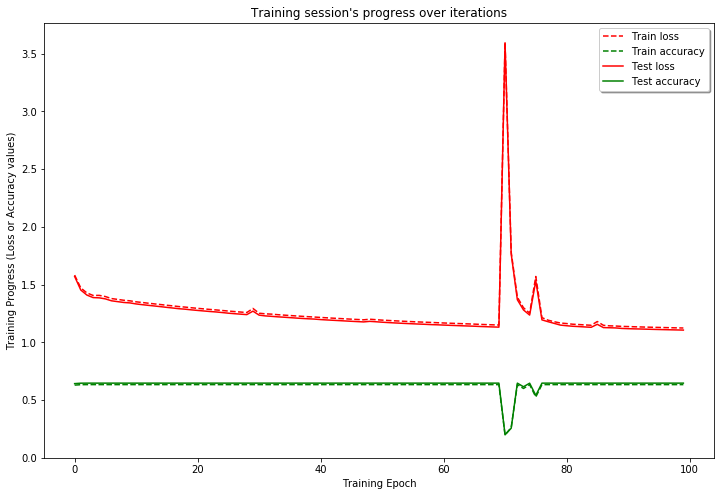

In [30]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

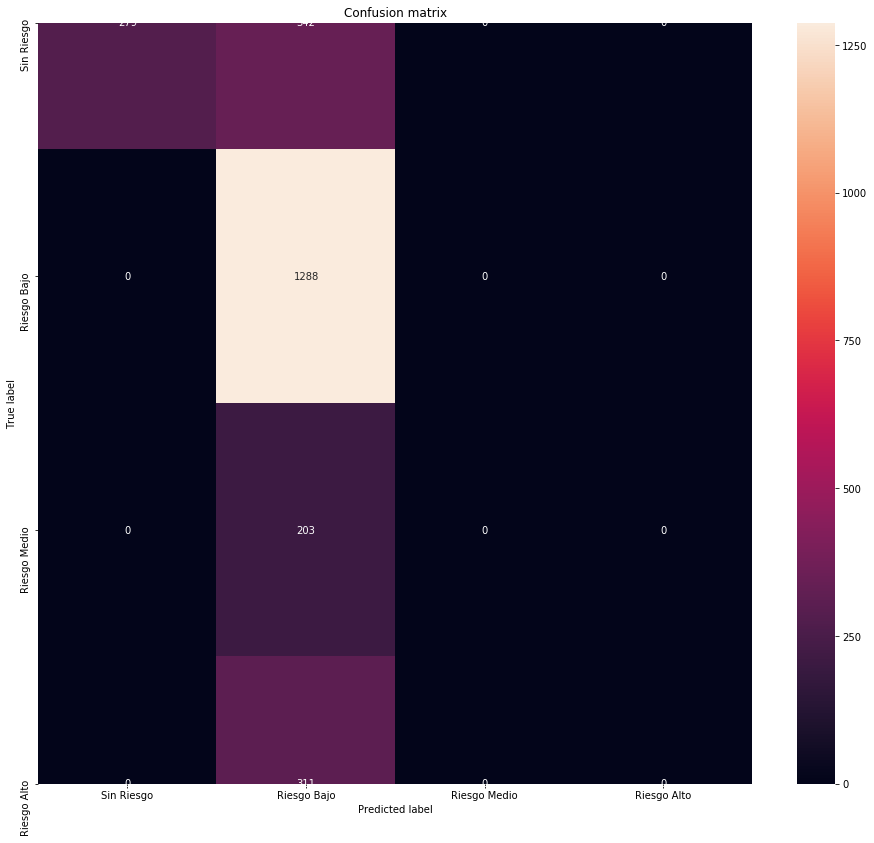

In [31]:
LABELS = ['Sin Riesgo','Riesgo Bajo', 'Riesgo Medio', 'Riesgo Alto']

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [32]:
pickle.dump(predictions, open("predictions.p", "wb"))
pickle.dump(history, open("history.p", "wb"))
tf.train.write_graph(sess.graph_def, '.', r'C:\Users\Carlos\Documents\UPM\TFM\har.pbtxt')
saver.save(sess, save_path = r"C:\Users\Carlos\Documents\UPM\TFM\har.ckpt")
sess.close()

In [33]:
history = pickle.load(open("history.p", "rb"))
predictions = pickle.load(open("predictions.p", "rb"))

In [34]:
from tensorflow.python.tools import freeze_graph

MODEL_NAME = 'har'
sess=tf.Session()
saver = tf.train.import_meta_graph(r"C:\Users\Carlos\Documents\UPM\TFM\har.ckpt.meta")
saver.restore(sess, r"C:\Users\Carlos\Documents\UPM\TFM\har.ckpt")
input_graph_path = r'C:\Users\Carlos\Documents\UPM\TFM\\' + MODEL_NAME+'.pbtxt'
checkpoint_path = r'C:\Users\Carlos\Documents\UPM\TFM\har.ckpt'
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'frozen_'+MODEL_NAME+'.pb'

freeze_graph.freeze_graph(input_graph_path, input_saver="",
                          input_binary=False, input_checkpoint=checkpoint_path,
                          output_node_names="y_", restore_op_name="save/restore_all",
                          filename_tensor_name="save/Const:0",
                          output_graph=output_frozen_graph_name, clear_devices=True, initializer_nodes="")

INFO:tensorflow:Restoring parameters from C:\Users\Carlos\Documents\UPM\TFM\har.ckpt
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Carlos\Documents\UPM\TFM\har.ckpt
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 6 variables.
INFO:tensorflow:Converted 6 variables to const ops.


node {
  name: "input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 30
        }
        dim {
          size: 3
        }
      }
    }
  }
}
node {
  name: "Variable"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 3
          }
          dim {
            size: 64
          }
        }
        tensor_content: "b\276`\272\314o\253\277\272\373\354?\214\007\257\272m}\350\275\212\210\003?\265\215\246\272\237t\242\272\321A\315=\343\020\237>\245L\026>K-#<\215\244\234?4\021T\276\376_\321>j\360\353\275\222T\203\277Z\257\'\275\340\357b?\373;\336\275\243\231\211\275\364<0\276\371\230\014\277e*\215\277\017\n\205=\003\316\213\277\324\003\314\275\363\035\325\270\2

In [13]:
# normalizacion de los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [8]:
import tensorflow as tf
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from pathlib import Path
from absl import app
from absl import flags
from absl import logging
import keras
from keras import backend as K
from keras.models import model_from_json, model_from_yaml

In [5]:
Xtrain, Xtest=train.loc[:, df.columns != 'pain'], test.loc[:, df.columns != 'pain']
Ytrain, Ytest=train['pain'], test['pain']

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [4]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = numpy.reshape(Xtrain, (Xtrain.shape[0], 1, Xtrain.shape[1]))
testX = numpy.reshape(Xtest, (Xtest.shape[0], 1, Xtest.shape[1]))

In [ ]:
#creamos la LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [ ]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [10]:
len(train[1])

136

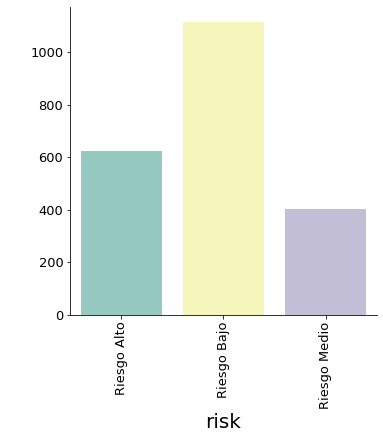

In [29]:
for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, palette="Set3")
        axes = fig.axes.flatten()
        axes[0].set_xlabel(col,fontsize=20)
        axes[0].set_ylabel(" ",fontsize=20)
        axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), rotation=90, fontsize = 13)
        axes[0].set_yticklabels(axes[0].get_ymajorticklabels(), fontsize = 13)        
        plt.show()

In [2]:
n0=0
n1=0
n2=0
n3=0
nraro=0

for i in range(0, len(labels)):
    if(labels[i])==0:
        n0+=1
    elif(labels[i])==1:
        n1+=1
    elif(labels[i])==2:
        n2+=1
    elif (labels[i])==3:
        n3+=1
    else:
        nraro+=1
print(n0)
print(n1)
print (n2)
print(n3)
print(nraro)

5967
1700
2615
0
0


In [32]:
a=[[[1, 2, 3], [4, 5, 6],[7, 8, 9], [10, 11, 12]],[[13, 14, 15], [17, 18, 19],[20, 21, 22], [23, 24, 25]]]
np.array(a).shape

(2, 4, 3)

In [36]:
import h5py

layers = []
f = h5py.File('model.hdf5','r')
for key in f.keys():
    layer_weights={}
    for value in f[key].values():
        layer_weights[value.name.split('/')[-1]] = np.array(value)
        print (value.name, np.array(value).shape)
    layers.append(layer_weights)
    
for l in model.layers:
    print (l.trainable_weights)

/dense_1/dense_1 (2,)
/lstm_1/lstm_1 (3,)
/lstm_2/lstm_2 (3,)
[]
[lstm_1/kernel, lstm_1/recurrent_kernel, lstm_1/bias]
[lstm_2/kernel, lstm_2/recurrent_kernel, lstm_2/bias]
[dense_1/kernel, dense_1/bias]


In [30]:
listname=['0_param_0.txt','0_param_1.txt','0_param_2.txt','0_param_3.txt','0_param_4.txt','0_param_5.txt','0_param_6.txt','0_param_7.txt','0_param_8.txt','0_param_9.txt','0_param_10.txt','0_param_11.txt','1_param_0.txt','1_param_1.txt','1_param_2.txt','1_param_3.txt','1_param_4.txt','1_param_5.txt','1_param_6.txt','1_param_7.txt','1_param_8.txt','1_param_9.txt','1_param_10.txt','1_param_11.txt','2_param_0.txt','2_param_1.txt']
listvalues=[W_i1, W_f1, W_c1, W_o1, U_i1, U_f1, U_c1, U_o1, b_i1, b_f1, b_c1, b_o1, W_i2, W_f2, W_c2, W_o2, U_i2, U_f2, U_c2, U_o2, b_i2, b_f2, b_c2, b_o2, dense_1_W, dense_1_b]
for i in range(len(listname)):
    np.savetxt('weights/' + listname[i], listvalues[i])

In [91]:
len(model.layers[2].get_weights())

(64, 4)

In [84]:
model.layers[1].trainable_weights

[lstm_1/kernel, lstm_1/recurrent_kernel, lstm_1/bias]

In [15]:
units=64

W1 = model.layers[1].get_weights()[0]
U1 = model.layers[1].get_weights()[1]
b1 = model.layers[1].get_weights()[2]

W_i1 = W1[:, :units]
W_f1 = W1[:, units: units * 2]
W_c1 = W1[:, units * 2: units * 3]
W_o1 = W1[:, units * 3:]

U_i1 = U1[:, :units]
U_f1 = U1[:, units: units * 2]
U_c1 = U1[:, units * 2: units * 3]
U_o1 = U1[:, units * 3:]

b_i1 = b1[:units]
b_f1 = b1[units: units * 2]
b_c1 = b1[units * 2: units * 3]
b_o1 = b1[units * 3:]

In [16]:
units=64

W = model.layers[2].get_weights()[0]
U = model.layers[2].get_weights()[1]
b = model.layers[2].get_weights()[2]

W_i2 = W[:, :units]
W_f2 = W[:, units: units * 2]
W_c2 = W[:, units * 2: units * 3]
W_o2 = W[:, units * 3:]

U_i2 = U[:, :units]
U_f2 = U[:, units: units * 2]
U_c2 = U[:, units * 2: units * 3]
U_o2 = U[:, units * 3:]

b_i2 = b[:units]
b_f2 = b[units: units * 2]
b_c2 = b[units * 2: units * 3]
b_o2 = b[units * 3:]

In [17]:
dense_1_W=model.layers[3].get_weights()[0]
dense_1_b=model.layers[3].get_weights()[1]

In [34]:
import sys
import numpy 

numpy.set_printoptions(threshold=sys.maxsize)


np.savetxt('weights/pesos1.txt', X_test[4])
np.savetxt('weights/pesos2.txt', X_test[9])

In [28]:
model.predict(np.array(a))

array([[0.3076429 , 0.38309243, 0.07846835, 0.23079629]], dtype=float32)

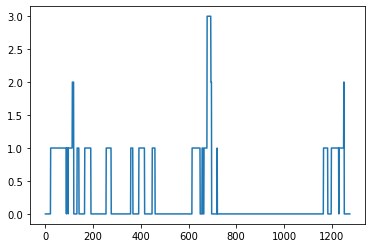

In [16]:

plt.plot(np.argmax(pred_probabilities1,1))

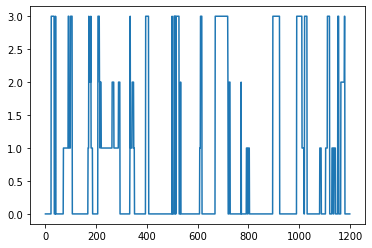

In [17]:
plt.plot(np.argmax(pred_probabilities1,1)[0:1200])

In [78]:
n0=0
n1=0
n2=0 
n3=0
ndis=0
#data1=np.array(labels3)

for i in range(len(labels3)):
    if (labels3[i]==0):
        n0+=1
    elif(labels3[i]==1):
        n1+=1
    elif(labels3[i]==2):
        n2+=1
    elif(labels3[i]==3):
        n3+=1
    else:
        #y_train[i]=0
        ndis+=1
        print(labels3[i])
#print(n0/(n1+n2+n3+n0), n1/(n1+n2+n3+n0), n2/(n1+n2+n3+n0), n3/(n1+n2+n3+n0) )
print(n0, n1, n2, n3, ndis)

0 336 1982 0 0


In [2]:
df1=pd.read_csv(r'C:\Users\Carlos\Documents\UPM\TFM\Documentos\presentacion1.csv')
#df2=pd.read_csv(r'C:\Users\Carlos\Documents\UPM\TFM\Experiments_dataset\stadistics_std\Basal1.csv')

In [52]:
labels1=[]
data1=[]
rootDir=r'C:\Users\Carlos\Documents\UPM\TFM\Experiments_dataset\prueba1'
a=os.listdir(rootDir) 
for arch in a:
    df1=pd.read_csv(rootDir + '\\'+arch)
    df1['pain']=df1['pain'].apply(fun)
    for i in range (0, len(df1['pain'])-30):
        labels1.append(df1['pain'][i])
    a2D_segments=df1.drop(['pain'],axis=1).values
    print(a2D_segments.shape)
    for i in range (0, len(a2D_segments)-timestep):
         data1.append(a2D_segments[i:i+timestep]) 
np.array(data1).shape

(2174, 66)


(2144, 30, 66)

In [53]:
pred_probabilities1= model.predict(np.array(data1))
onehot_test1 = to_categorical(labels1, num_classes=4)
recall=recall_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities1,1), average='macro') 
prec=precision_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities1,1), average='macro')
f1=f1_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities1,1), average='macro')
acc=accuracy_score(np.argmax(onehot_test1,1), np.argmax(pred_probabilities1,1))
print(acc)
print(recall)
print(prec)
print(f1)
onehot_test1.shape

0.7868470149253731
0.8063527999902325
0.7858217414641033
0.7893469303481413


(2144, 4)

Confusion Matrix:
 [[402   5   0  40]
 [154 480  18  17]
 [  1   2 365  36]
 [  0  80 104 440]]


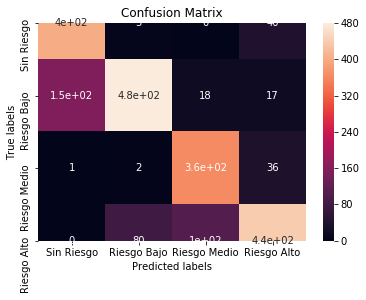

In [54]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm


ConfMatrix=cm(np.argmax(onehot_test1,1), np.argmax(pred_probabilities1,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['Sin Riesgo', 'Riesgo Bajo','Riesgo Medio','Riesgo Alto'])
ax.yaxis.set_ticklabels(['Sin Riesgo', 'Riesgo Bajo','Riesgo Medio','Riesgo Alto']);

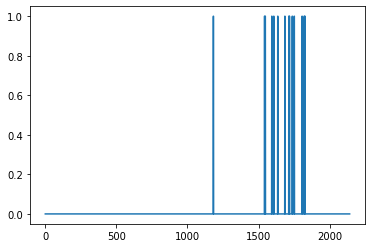

In [46]:
a=np.argmax(pred_probabilities1,1)
for i in range(len(a)):
    if (a[i]<2):
        a[i]=0
dur_migraine=np.diff(abs(np.diff(a))==1)
plt.plot(dur_migraine)

In [14]:
#pred_probabilities1= model.predict(np.array(data1))
a=pd.DataFrame(data=pred_probabilities, columns=['pred_clase0', 'pred_clase1','pred_clase2'])
a['clase_orig']=labels2
a['clase_elegida']=np.argmax(pred_probabilities,1)
a.to_csv(r'C:\Users\Carlos\Documents\UPM\TFM\Documentos\presentacion.csv', index=None, header=True)

In [45]:
df1.drop(columns=['maxEDA_smna30','maxEDA_smna15','maxEDA_smna5','countEDA_smna30','countEDA_smna15','countEDA_smna5'], inplace=True)

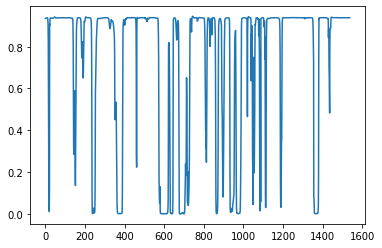

In [49]:
plt.plot(a['pred_clase0'])

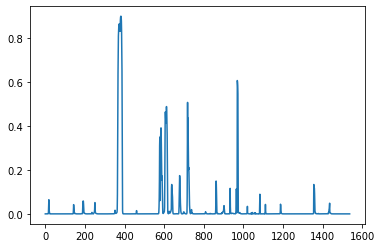

In [48]:
plt.plot(a['pred_clase1'])

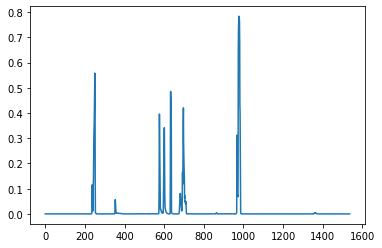

In [47]:
plt.plot(a['pred_clase2'])

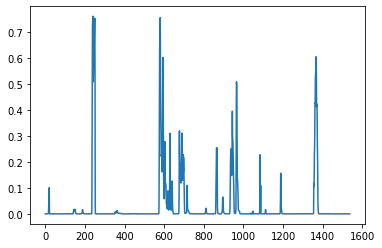

In [46]:
plt.plot(a['pred_clase3'])

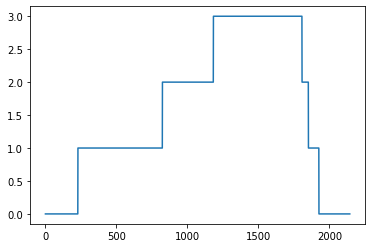

In [56]:
plt.plot(a['clase_orig'])

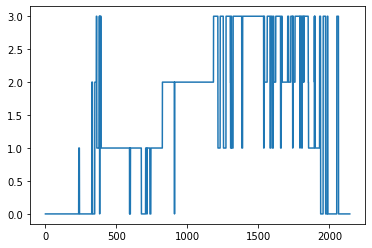

In [57]:
plt.plot(a['clase_elegida'])

In [23]:
np.array(data).shape

(10868, 30, 66)

In [36]:
pred_probabilities[700]>0.75


array([False,  True,  True])

In [9]:
df1=pd.read_csv(r'C:\Users\Carlos\Documents\UPM\TFM\Experiments_dataset\prueba1\Basal4.csv')
df1

,meanTEMP5,meanHR5,meanTEMP15,meanHR15,meanTEMP30,meanHR30,stdTEMP5,stdHR5,stdTEMP15,stdHR15,...,maxdiffEDA_tonic5,maxdiffEDA_tonic15,maxdiffEDA_tonic30,countEDA_smna5,countEDA_smna15,countEDA_smna30,maxEDA_smna5,maxEDA_smna15,maxEDA_smna30,pain
0,32.934226,67.569153,32.934226,67.569153,32.934226,67.569153,0.038379,4.305105,0.038379,4.305105,...,-0.007613,-0.007613,-0.007613,0,0,0,0.202023,0.202023,0.202023,-1
1,33.023486,67.698235,33.023486,67.698235,33.023486,67.698235,0.101291,3.417438,0.101291,3.417438,...,-0.007613,-0.007613,-0.007613,0,0,0,0.202023,0.202023,0.202023,-1
2,33.111586,68.182514,33.111586,68.182514,33.111586,68.182514,0.151152,3.165622,0.151152,3.165622,...,-0.007613,-0.007613,-0.007613,0,0,0,0.269804,0.269804,0.269804,-1
3,33.181324,68.948661,33.181324,68.948661,33.181324,68.948661,0.178796,3.086799,0.178796,3.086799,...,-0.007613,-0.007613,-0.007613,0,0,0,0.269804,0.269804,0.269804,-1
4,33.252686,68.885786,33.252686,68.885786,33.252686,68.885786,0.215774,2.767410,0.215774,2.767410,...,-0.007613,-0.007613,-0.007613,0,0,0,0.269804,0.269804,0.269804,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,33.718774,104.355217,33.998213,89.512792,33.948094,84.334497,0.366992,16.453556,0.320852,14.509078,...,0.144597,0.144597,0.144597,520,609,739,46.504778,46.504778,46.504778,-1
2374,33.512786,109.579532,33.961409,91.275873,33.897384,85.125620,0.258543,11.740923,0.367647,14.959536,...,0.144597,0.144597,0.144597,489,624,754,46.504778,46.504778,46.504778,-1
2375,33.348198,106.526957,33.905010,91.473382,33.843763,85.255503,0.166520,15.559662,0.422319,14.829408,...,0.144597,0.144597,0.144597,373,635,766,41.938328,46.504778,46.504778,-1
2376,33.207882,98.940736,33.825510,91.215706,33.782493,85.349633,0.188414,17.779821,0.487524,15.056479,...,0.144597,0.144597,0.144597,268,639,742,41.938328,46.504778,46.504778,-1


In [19]:
pred_probabilities[0]

array([0.16817313, 0.12019119, 0.71163565], dtype=float32)

In [42]:
model.predict(np.array(data4))

array([[0.85180867, 0.03667252, 0.11151882]], dtype=float32)

In [56]:
model.predict(np.array(data4))

array([[0.16689971, 0.11994901, 0.7131513 ]], dtype=float32)

In [33]:
data3[0][29]

array([ 0.027794  , -0.88591319,  0.17242322, -0.5440791 , -2.68790814,
       -1.81038745,  0.13962859,  0.09983907,  0.41715224, -0.03800653,
        8.2643159 ,  4.09463532,  0.08823176, -0.74629873,  1.23247784,
       -0.57908936,  1.40978452, -0.69888331,  0.027794  , -0.88591319,
        0.17242322, -0.5440791 , -2.68790814, -1.81038745,  0.22540051,
       -0.69437485, -1.10671066, -0.64390095,  7.6068636 ,  2.83365058,
       -0.5007511 , -0.55784343, -0.59809282, -0.68166286, -0.8553163 ,
       -0.92205539, -0.71532733, -0.8964611 , -0.98865997, -0.5007511 ,
       -0.55784343, -0.59809282, -0.71088115, -0.82564389, -1.03935531,
       -0.6460395 , -0.73418938, -0.74155149, -0.69000055, -0.95110721,
       -0.9898091 , -0.75768615, -0.80173674, -0.75072387, -0.6460395 ,
       -0.73418938, -0.74155149,  0.0730645 ,  0.13068845, -0.1667783 ,
       -0.53961307, -0.58806114, -0.61449844, -0.73465807, -0.90983958,
       -1.16587548])

In [53]:
df1.loc[0:28,:]=df1.loc[29].values
df1

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,meanTEMP5,meanHR5,meanTEMP15,meanHR15,meanTEMP30,meanHR30,stdTEMP5,stdHR5,stdTEMP15,stdHR15,...,minEDA_tonic30,maxdiffEDA_tonic5,maxdiffEDA_tonic15,maxdiffEDA_tonic30,countEDA_smna5,countEDA_smna15,countEDA_smna30,maxEDA_smna5,maxEDA_smna15,maxEDA_smna30
0,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
1,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
2,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
3,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
4,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
5,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
6,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
7,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
8,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875
9,0.027794,-0.885913,0.172423,-0.544079,-2.687908,-1.810387,0.139629,0.099839,0.417152,-0.038007,...,-0.741551,0.073065,0.130688,-0.166778,-0.539613,-0.588061,-0.614498,-0.734658,-0.90984,-1.165875


In [54]:
data4=[]
data4.append(df1.values[0:30])


In [55]:
np.array(data4).shape

(1, 30, 66)

In [12]:
d={'probabilidad':pred_probabilities,'etiqueta':labels2}
df=pd.DataFrame(data=d)
df.to_csv(r'C:\Users\Carlos\Documents\UPM\TFM\Documentos\presentacion.csv', index=None, header=True)

Exception: Data must be 1-dimensional

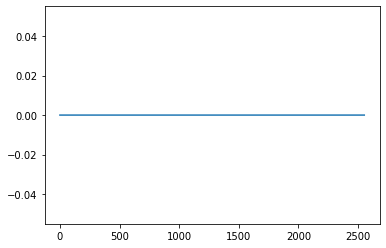

In [10]:
plt.plot(labels2[4536:7089])

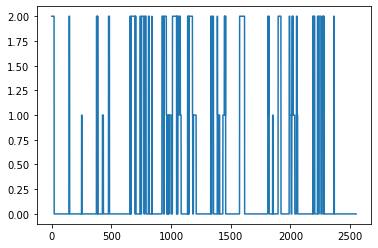

In [11]:
plt.plot(maximo[4536:7089])

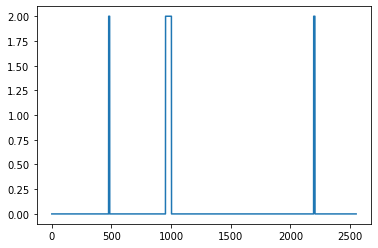

In [12]:
plt.plot(probabilidad_alta[4536:7089])

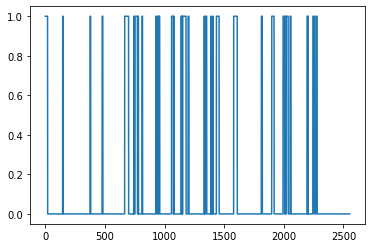

In [13]:
plt.plot(probabilidad_suma[4536:7089])

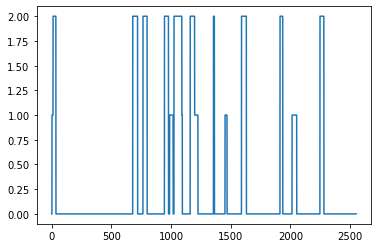

In [14]:
plt.plot(promedio_max[4536:7089])

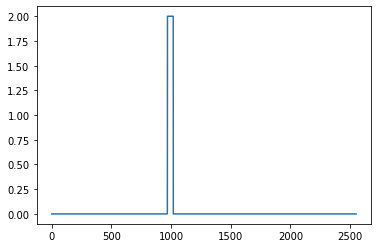

In [15]:
plt.plot(promedio_prob[4536:7089])

In [10]:
df1=df1.loc[0:1249]
df1.to_csv(r'C:\Users\Carlos\Documents\UPM\TFM\Documentos\presentacion1.csv', index=None, header=True)

In [11]:
df1

,0,0.1,0.2,0.3,0.4
0,0.706572,0.087137,0.206291,0,0
1,0.719988,0.080109,0.199903,0,0
2,0.749952,0.066133,0.183915,0,0
3,0.772813,0.056069,0.171118,0,0
4,0.789551,0.049348,0.161101,0,0
...,...,...,...,...,...
1245,0.604305,0.133764,0.261931,0,0
1246,0.653657,0.106664,0.239678,0,0
1247,0.652557,0.107075,0.240368,0,0
1248,0.690806,0.087019,0.222175,0,0
